# Supply Chain Analysis

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [195]:
import os
url = os.getcwd()+'/supply_chain_data.csv'
url

'/Users/sunnycao/Desktop/Project/Python/Supply Chain Analysis/supply_chain_data.csv'

In [196]:
df = pd.read_csv(url)
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [197]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [198]:
# Relationship between price and revenue generated #
fig = px.scatter(df,x = 'Price', y = 'Revenue generated', color = 'Product type',hover_data =['Number of products sold'],
                trendline = 'ols',title='Prices vs. Revenue generated')
fig.show()

In [199]:
# Company generate revenue by skincare, the higher price of skincare the more revenue generated

In [200]:
# Sales by product type
sales_data = df.groupby('Product type',as_index=False)['Number of products sold'].sum()
pie = px.pie(sales_data,values = 'Number of products sold',names = 'Product type',title = 'Sales by Product Type',
            hover_data=['Number of products sold'],hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
pie.update_traces(textposition='inside',textinfo='percent+label')
pie.show()

In [201]:
# Revenue generated by shipping carriers
Shipping_carriers = df.groupby('Shipping carriers',as_index=False)['Revenue generated'].sum()
bar = px.bar(Shipping_carriers,x='Shipping carriers',y='Revenue generated',title='Revenue by Shipping Carriers')
bar.show()

In [202]:
# Company use three shipping carriers and carriers B generated highest revenue for the company

In [203]:
# Find average lead time and manufacturing costs for different products #
Lead_time = df.groupby('Product type',as_index = False)['Lead time'].mean()
Manufacturing_costs = df.groupby('Product type', as_index = False)['Manufacturing costs'].mean()
result = pd.merge(Lead_time,Manufacturing_costs,on='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing costs':'Avg manufacturing costs'},inplace=True)
result

,Product type,Avg lead time,Avg manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


# SKU Analysis

In [204]:
# Revenue generated by each SKU
Revenue_SKU = px.line(df,x='SKU',y='Revenue generated',title = 'Revenue generated by SKU')
Revenue_SKU.show()

In [205]:
# Stock levels by each SKU
Stock_SKU = px.line(df,x='SKU',y='Stock levels',title = 'Stock levels by SKU')
Stock_SKU.show()

In [206]:
# Order quantity by each SKU
Order_SKU = px.bar(df,x='SKU',y='Order quantities',title = 'Order quantity by SKU')
Order_SKU.show()

# Cost Analysis

Text(0.5, 1.0, 'Shipping costs by Shipping carriers')

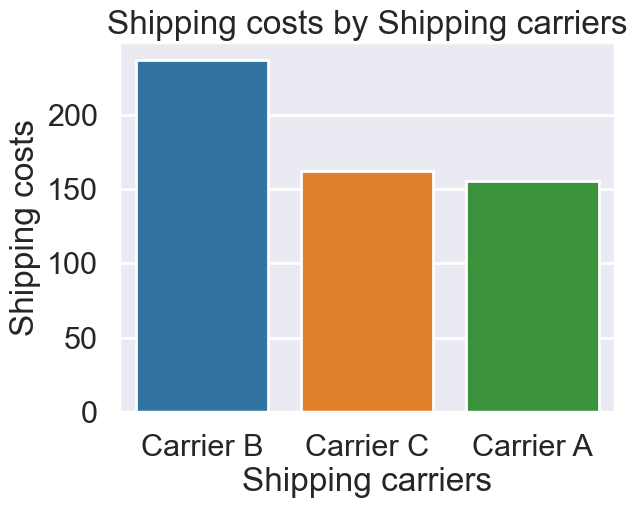

In [207]:
# Shipping costs by carriers
import seaborn as sns
Shipping_carriers = df.groupby('Shipping carriers',as_index=False)['Shipping costs'].sum()
Shipping_carriers = Shipping_carriers.sort_values(by='Shipping costs',ascending=False)
Shipping_bar = sns.barplot(x='Shipping carriers',y='Shipping costs',data=Shipping_carriers)
plt.title('Shipping costs by Shipping carriers')

In [208]:
Shipping_by_carriers = px.bar(df,x='Shipping carriers',y='Shipping costs',title='Shipping costs by Shipping carriers')
Shipping_by_carriers.show()

In [209]:
# Carrier B generated the highest revenue, at the meantime, cost the most as well

In [210]:
# Costs by transportation mode
Costs_trans = px.pie(df,
                     values='Costs',
                     names='Transportation modes',
                     title='Costs distributions by transportation modes',
                     hover_data=['Costs'],
                     hole=0.5,
                     color_discrete_sequence=px.colors.qualitative.Pastel)
pie.update_traces(textposition='inside',textinfo='label+percent')
Costs_trans.show()

In [211]:
# Company spend more on Road and Rail transportation methods  

# Defect Rate

In [212]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [213]:
# Defect rates by products
Defect_product = df.groupby('Product type',as_index=False)['Defect rates'].mean()
Defect_product = px.bar(Defect_product,x='Product type',y='Defect rates',title='Average Defect Rates by Products')
Defect_product.show()

In [214]:
# Defect ratea by transportation modes

pivot_table = pd.pivot_table(df,
                             values = 'Defect rates',
                             index = 'Transportation modes',
                             aggfunc = 'mean')
Defect_trans = px.pie(pivot_table,
                      values = 'Defect rates',
                      names = pivot_table.index,
                      hole = 0.5,
                      title = 'Defect rates distribution by Transportation modes',
                      color_discrete_sequence=px.colors.qualitative.Pastel)
pie.update_traces(textposition='inside',textinfo='percent+label')
Defect_trans.show()

### Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.